In [9]:
import numpy as np
import sympy
import random
import math
import matplotlib.pyplot as plt
from sympy import *
import scipy
from scipy.stats import chi2  

theta_min = -3
theta_max = 3
grid_num = 1001
thetagrid = np.linspace(theta_min, theta_max, grid_num)
jcr_u = np.linspace(theta_min, theta_max, grid_num)
jcr_l = np.linspace(theta_min, theta_max, grid_num)

theta = 0
x1 = np.random.normal(0) + theta
x2 = np.random.normal(0) + theta
alpha = 0.1
for i in range(len(thetagrid)):
    if (x1-thetagrid[i])**2 < chi2.isf(q=alpha, df=2):
        jcr_u[i] = thetagrid[i] + np.sqrt(chi2.isf(q=alpha, df=2)-(x1-thetagrid[i])**2)
        jcr_l[i] = thetagrid[i] - np.sqrt(chi2.isf(q=alpha, df=2)-(x1-thetagrid[i])**2)
    else:
        jcr_u[i] = 0 
        jcr_l[i] = 0

In [11]:
theta_l = x1 - scipy.stats.norm.ppf( .95,0,1)
theta_u = x1 + scipy.stats.norm.ppf( .95,0,1)
x_l = x1 - np.sqrt(2)*scipy.stats.norm.ppf( .95,0,1)
x_u = x1 + np.sqrt(2)*scipy.stats.norm.ppf( .95,0,1)

In [17]:
print(x1)

0.6064028854790813


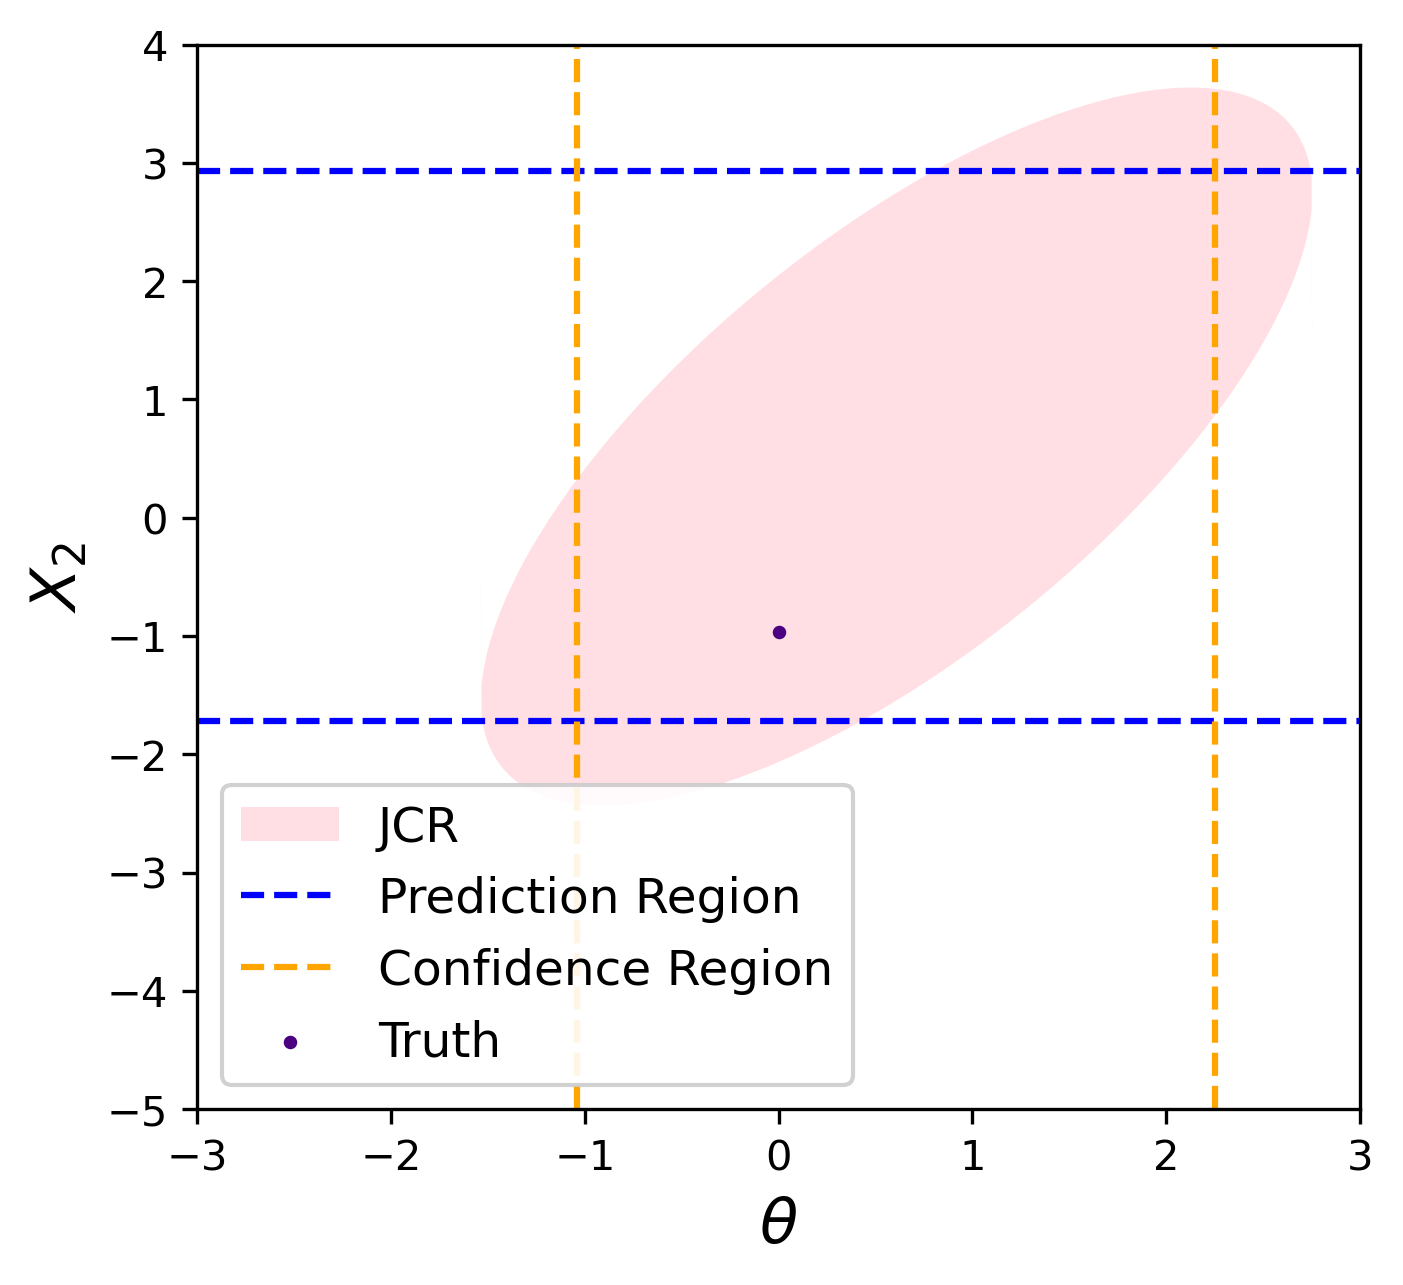

In [25]:
fig, ax = plt.subplots(dpi=300,figsize=(5,4.7))

ax.fill_between(thetagrid, jcr_l, jcr_u, alpha=.5, linewidth=0,label='JCR',color='pink')
plt.hlines([x_l,x_u], -3, 3,colors='b', linestyles='dashed',label='Prediction Region')
plt.vlines([theta_l,theta_u], -5, 4,colors='orange', linestyles='dashed',label='Confidence Region')
plt.scatter(theta,x2,c='indigo',s=5,label='Truth')
plt.ylabel('$X_2$',size=15)
plt.xlabel('$θ$',size=15)
plt.xlim(-3,3)
plt.ylim(-5,4)
plt.legend(loc='lower left',fontsize=11.7,framealpha=0.9)
plt.savefig('cartoon.png',bbox_inches = 'tight')
plt.show()

In [26]:
print(x2)

-0.961890071206669
